In [2]:
import sklearn

In [10]:
import numpy as np
import pygame

bg_color = (255, 255, 255)
color = (0, 0, 255)
radius = 2
width, height = 640, 480
dataset = np.empty([0, 2], dtype='f')
R = 30


def create_data(position):
    x, y = position
    global dataset
    r = np.random.uniform(0, R)
    phi = np.random.uniform(0, 2 * np.pi)
    coord = [x + r * np.cos(phi), y + r * np.sin(phi)]
    dataset = np.append(dataset, [coord], axis=0)


screen = pygame.display.set_mode((width, height))
pygame.init()
pygame.display.set_caption("Dataset")
running = True
pushing = False
screen.fill(bg_color)
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
    if pushing and np.random.uniform(0, 1) > 0.5:
        create_data(pygame.mouse.get_pos())  # event.pos
    for dot in dataset:
        pygame.draw.circle(screen, color, (int(dot[0]), int(dot[1])), radius)
    pygame.display.flip()
pygame.quit()

In [11]:
print(dataset)

[[ 97.55455982  73.24030549]
 [102.81052125  63.82121436]
 [ 88.19363534  76.3577827 ]
 ...
 [287.27472216 355.20541391]
 [290.9170855  373.31859987]
 [287.96426175 376.2175305 ]]


/home/vladislav/PycharmProjects/ML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/home/vladislav/PycharmProjects/ML/venv/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


[0 0 0 3 0 3 0 3 3 3 0 0 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 0 3
 0 0 0 0 3 3 3 0 0 0 0 3 0 0 0 3 0 0 0 0 3 0 3 0 3 3 0 3 0 0 3 0 0 0 3 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 3 0 3
 0 0 3 3 0 0 0 3 0 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 3 0 0 0 3 3 3 3 3
 0 0 0 3 0 3 3 0 0 3 3 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0
 0 3 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 3 0 3 3 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 0 0 0 0 3 3
 0 3 3 0 0 0 3 3 0 0 0 0 0 0 0 0 3 0 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 3 0 3 0
 3 0 0 3 0 3 0 0 0 3 0 0 0 3 3 0 0 0 0 0 0 3 0 3 0 3 0 3 3 3 0 3 0 3 0 0 0
 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 0 3 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 3 0
 0 0 0 3 3 3 3 0 0 0 0 3 3 0 0 3 3 1 0 1 0 3 0 3 0 3 3 0 0 0 3 3 0 0 0 3 0
 3 0 3 3 0 3 0 0 0 0 0 0 0 0 0 3 0 3 3 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 3 0 3 0 0 3 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0
 0 3 0 0 0 3 0 3 0 0 0 0 

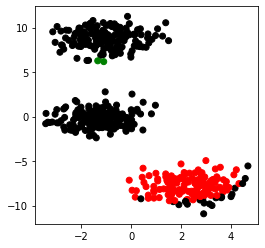

In [25]:
import matplotlib.pyplot as plt
import numpy as np


class C_Means:

    def __init__(self, dataset, n_clusters=3, fuzzy_c=2, cut_param=0.9):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.fuzzy_c = fuzzy_c
        self.cut_param = cut_param
        self.max_iter_num = 100
        self.tolerance = 0.01
        self.dist = np.zeros((self.dataset.shape[0], self.n_clusters))
        self.centroids = dataset[np.random.choice(dataset.shape[0], size=n_clusters, replace=False)]
        self.u = np.array(
            [[np.random.uniform(0, 1) for i in range(self.n_clusters)] for j in range(self.dataset.shape[0])])
        self.labels = np.array([])

    def get_dist2(self, lst_1, lst_2):
        return sum((i - j) ** 2 for i, j in zip(lst_1, lst_2))

    def get_dist(self, lst_1, lst_2):
        return np.sqrt(sum((i - j) ** 2 for i, j in zip(lst_1, lst_2)))

    def get_dist_quarter(self, lst_1, lst_2):
        return sum(np.fabs(i - j) for i, j in zip(lst_1, lst_2))

    def get_dist_chebishev(self, lst_1, lst_2):
        return max(np.fabs(i - j) for i, j in zip(lst_1, lst_2))

    def distribute_data(self):
        self.dist = np.array([[self.get_dist2(i, j)
                               for i in self.centroids] for j
                              in self.dataset])
        try:
            self.u = (1 / self.dist) ** (1 / (self.fuzzy_c - 1))
            self.u /= self.u.sum(axis=1)[:, None]
        except ZeroDivisionError:
            self.u = np.NaN
        # handle NaN
        self.u[np.isnan(self.u)] = 1

    def recalculate_centroids(self):
        self.centroids = (self.u.T).dot(self.dataset) / self.u.sum(axis=0)[:, None]
        # print(self.centroids)

    def fit(self):
        iter = 1
        while iter < self.max_iter_num:
            prev_centroids = np.copy(self.centroids)
            self.recalculate_centroids()
            self.distribute_data()
            maximum = max([self.get_dist2(i, k) for i, k in zip(self.centroids, prev_centroids)])
            if maximum < self.tolerance:
                break
            iter += 1

    def get_labels(self):
        for row in self.u:
            idx = 0
            for elem in row:
                if elem > self.cut_param:
                    idx = np.argmax(row) + 1
                    break
            self.labels = np.append(list(self.labels), idx).astype(int)
        return self.labels


def facade(test: C_Means):
    test.distribute_data()
    test.recalculate_centroids()
    test.fit()
    labels = test.get_labels()
    print(labels)
    return labels


def visualize(pred, dataset):
    colors = np.array(['black', 'green', 'blue', 'red'])
    plt.figure(figsize=(4, 4))
    plt.scatter(dataset[:, 0], dataset[:, 1], color=colors[pred])
    plt.show()

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=500, )
dataset = X
test = C_Means(dataset, 3)
labels = facade(test)
visualize(labels, dataset)